In [5]:
import numpy as np
from matplotlib import pyplot

Gradient descent is an Machine Learning (ML) algorithm that helps finding parameters $\theta_0$ to $\theta_n$ to minimize the cost function result for a given function.

In the following example, we can calculate the most optimal parameters from $\theta_0$ to $\theta_n$ for a linear function expressed with the following formula:

\begin{align}
h_\theta (x_0, x_1, x_2, x_3, ... x_n) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
\end{align}

We can easily represent the above formula using matrixes multiplication:

\begin{align}
h(x_1, x_2, x_3, ... x_n) = 
 \begin{matrix}
  [\theta_0, \theta_1, \theta_2, \theta_3, ... \theta_N]
 \end{matrix} * 
 \begin{matrix}
  [1 \\
  x_1 \\
  x_2 \\
  x_3 \\
  ... \\
  x_n]
 \end{matrix}
 \ = \theta^T * x
\end{align}


We will reference to the above formula as '**hypothesis**'.

Let's first have a look at the data set that we will be working with:

| Size (m2) | Num of bedrooms | Num of floors |  Price ($) |
|:---------:|:---------------:|:-------------:|:------:|
|    641    |        8        |       3       | 700000 |
|    300    |        4        |       2       | 560000 |
|    350    |        5        |       2       | 500000 |
|    180    |        3        |       1       | 250000 |

Let's encode those values into arrays.

In [6]:
x = np.matrix([
    [1, 641, 8, 3],
    [1, 300, 4, 2],
    [1, 350, 5, 2],
    [1, 180, 3, 1]
])

...and the expected result:

In [7]:
y = np.matrix([
    [700000],
    [560000],
    [500000],
    [250000]
])

In [8]:
alpha = .0008
m = y.shape[0]

Before we start the actual calculations, we should do **feature standarisation** which is a combination of feature scaling and mean normalisation.
The formula is fairly simple:
\begin{align}
X_i := \dfrac{X_i - \mu_i}{\sigma_i}
\end{align}

where

\begin{align}
\sigma_i = STD(X_i)
\end{align}

and

\begin{align}
\mu_i = AVG(X_i)
\end{align}

Recalculation formula for X:

In [9]:
trimmed_x = np.delete(x, 0, 1);
mu = np.mean(trimmed_x, 0)
si = np.std(trimmed_x, 0)

x_norm = (trimmed_x - mu) / si
x_norm = np.append(np.ones((4, 1)), x_norm, 1)

First step is to calculate the theta:

\begin{align*} & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \end{align*}

In [10]:
def calc_theta(alpha, m, thetas, x, y):
    return thetas - (alpha / m) * x.transpose() * (x * thetas - y)

In order to draw a plot, we should first define a function that will calculate the cost:

\begin{align}
J(\theta) = \dfrac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x_i) - y_i)^2
\end{align}

In [11]:
def calc_cost_fun(m, x, thetas, y):
    return 1 / (2 * m) * np.sum(np.square(x * thetas - y))

Now, let's create a plot function

In [12]:
def plot(i, cost):
    pyplot.plot(i, cost, 'r', label='Cost function')
    pyplot.legend(loc='upper left')
    pyplot.axhline(y=0.5, color='b', linestyle='--')
    pyplot.ylabel('Cost function value')
    pyplot.xlabel('Number of iterations')
    pyplot.show()

Now, let's run the gradient descent multiple times till convergence.

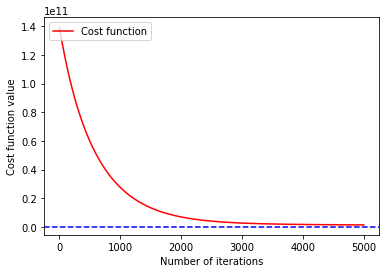

Calculated theta values: 
 [[493311.11330363]
 [ 34614.65184423]
 [ 19813.91074811]
 [ 96720.88608044]]


In [13]:
thetas = np.zeros([4, 1])
cost_history = []
iters = range(0, 5000)

for i in iters:
    thetas = calc_theta(alpha, m, thetas, x_norm, y)
    cost = calc_cost_fun(m, x_norm, thetas, y)
    cost_history.append(cost)

plot(iters, cost_history)
print(f"Calculated theta values: \n {thetas}")

Now, we can try to make a prediction for a property:

| Size (m2) | Num of bedrooms | Num of floors |  Price ($) |
|:---------:|:---------------:|:-------------:|:------:|
|    400    |        4        |       2       | ?????? |
|    200    |        2        |       3       | ?????? |

In [32]:
params = np.matrix([
    [1, 400, 4, 2],
    [1, 200, 2, 3],
])
mu2 = np.append(np.zeros((1, 1)), mu, 1)
si2 = np.append(np.ones((1, 1)), si, 1)
print(f"""Estimated price for first property: ${int((params[0] - mu2) / si2 * thetas)}
Estimated price for second property: ${int((params[1] - mu2) / si2 * thetas)}""")

Estimated price for first property: $489308
Estimated price for second property: $564049
